In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(34799,)
(4410,)
(12630,)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

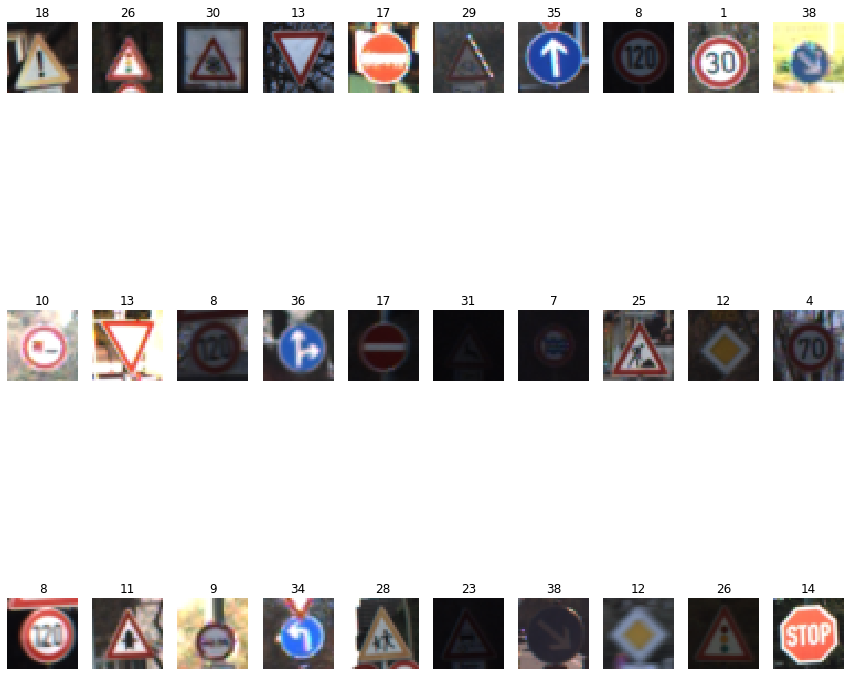

In [11]:
%matplotlib inline
fig, ax = plt.subplots(3, 10, figsize=(15, 15))
ax = ax.ravel()

for i in range(30):
    index = np.random.randint(0, len(X_train))
    img = X_train[index]
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(y_train[index])

In [14]:
df = pd.read_csv('signnames.csv')
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [22]:
df.loc[df['ClassId'] == 1]['SignName'].to_string()

'1    Speed limit (30km/h)'

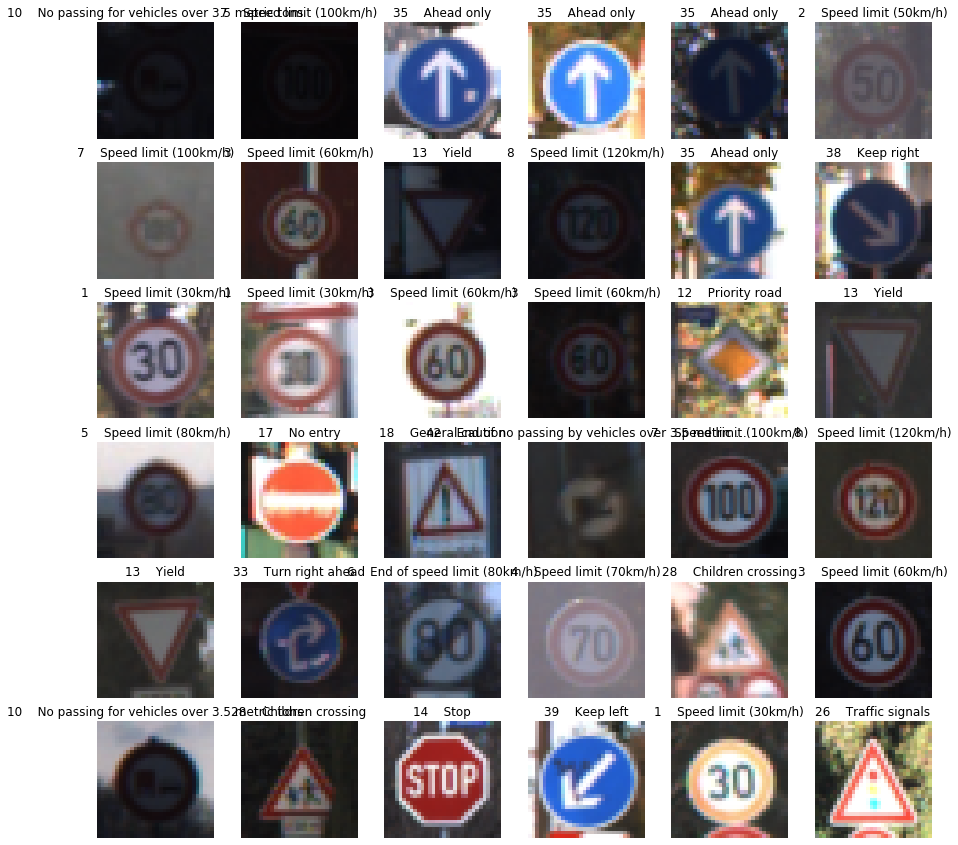

In [29]:
%matplotlib inline
fig, ax = plt.subplots(6, 6, figsize=(15, 15))
ax = ax.ravel()

for i in range(36):
    index = np.random.randint(0, len(X_train))
    img = X_train[index]
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(df.loc[df['ClassId'] == y_train[index]]['SignName'].to_string())
    

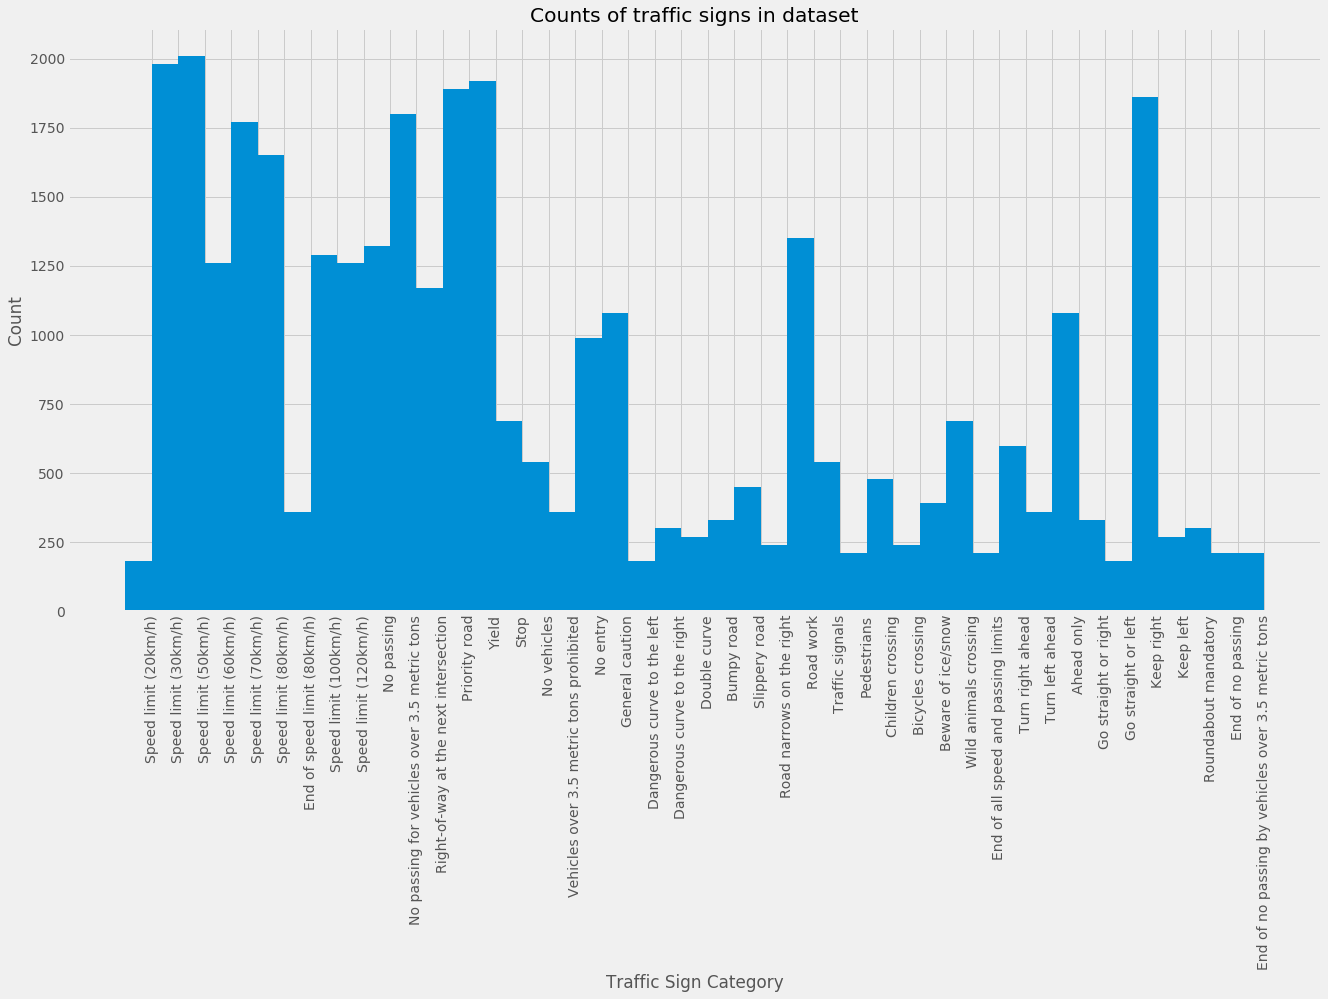

In [36]:
plt.style.use('fivethirtyeight')
n = 43

index = np.arange(n)
width = 1

data = np.zeros(n)
for i in range(len(X_train)):
    data[y_train[i]] += 1
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(index, data, width)

ax.set_ylabel('Count')
ax.set_xlabel('Traffic Sign Category')
ax.set_title('Counts of traffic signs in dataset')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(df.values[:, 1], rotation=90)

plt.show()

In [37]:
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

X_train = (X_train - 127) / 255
X_valid = (X_valid - 127) / 255
X_test = (X_test - 127) / 255

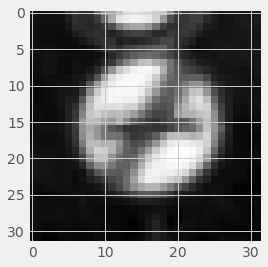

In [38]:
plt.imshow(X_train[3].squeeze(), cmap='gray')

In [39]:
import tensorflow as tf
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [43]:
X_train.shape

(34799, 32, 32, 1)

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization 
from keras.initializers import TruncatedNormal, Constant
from keras.optimizers import SGD 


In [77]:
def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

In [81]:
def AlexNet():
    model = Sequential()
    model.add(conv2d(96, 3, strides=(1, 1), padding='same', bias_init=0, input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(conv2d(256, 5))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(conv2d(384, 3, bias_init=0))
    model.add(conv2d(384, 3))
    model.add(conv2d(256, 3))
    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(dense(4096))
    model.add(Dropout(0.5))
    
    model.add(dense(4096))
    model.add(Dropout(0.5))
    
    model.add(dense(43, activation='softmax'))
    
    model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [82]:
model = AlexNet()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 96)        960       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 384)       

In [83]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
model.fit(X_train, y_one_hot, epochs=10, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 17s 20ms/step - loss: 1.9250 - accuracy: 0.4998 - val_loss: 0.4279 - val_accuracy: 0.9134
Epoch 2/10
870/870 [==============================] - 17s 20ms/step - loss: 0.1983 - accuracy: 0.9574 - val_loss: 0.1010 - val_accuracy: 0.9819
Epoch 3/10
870/870 [==============================] - 17s 20ms/step - loss: 0.0606 - accuracy: 0.9913 - val_loss: 0.0391 - val_accuracy: 0.9941
Epoch 4/10
870/870 [==============================] - 17s 19ms/step - loss: 0.0280 - accuracy: 0.9969 - val_loss: 0.0292 - val_accuracy: 0.9961
Epoch 5/10
870/870 [==============================] - 17s 20ms/step - loss: 0.0153 - accuracy: 0.9988 - val_loss: 0.0465 - val_accuracy: 0.9908
Epoch 6/10
870/870 [==============================] - 17s 20ms/step - loss: 0.0099 - accuracy: 0.9994 - val_loss: 0.0167 - val_accuracy: 0.9968
Epoch 7/10
870/870 [==============================] - 17s 19ms/step - loss: 0.0061 - accuracy: 0.9997 - val_loss: 0.0149 - val_accuracy:

In [94]:
y_one_hot_t = label_binarizer.fit_transform(y_test)
results = model.evaluate(X_test, y_one_hot_t, batch_size=128)
print(results)

99/99 [==============================] - 2s 16ms/step - loss: 0.1476 - accuracy: 0.9582
[0.147605761885643, 0.9581947922706604]


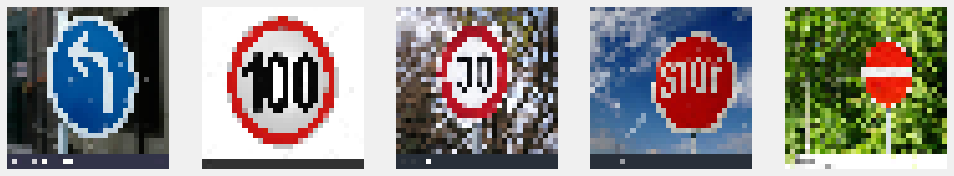

In [121]:
import cv2
import os
signnames = []

sample_images = []
path = './test_images/'

plt.figure(figsize=(15, 20))

for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sample_images.append(img)
    
sample_images = np.array(sample_images)
sample_images = sample_images/255

for i, image in enumerate(sample_images):
    grid = plt.subplot(len(sample_images)/4, 5, i+1)
    grid.imshow(image)
    plt.axis('off')

In [128]:
test_images = np.sum(sample_images/3, axis=3, keepdims=True)

In [129]:
predictions = model.predict(test_images)

In [136]:
print([list(pred).index(pred.max()) for pred in predictions])

[40, 7, 14, 2, 12]


In [132]:
grade

[0.6327538, 0.8786238, 0.29026163, 0.539518, 0.419544]